In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('911.csv')

In [3]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### 1) What are the top 5 zipcodes for 911 calls? 

In [4]:
pd.value_counts(data['zip'],ascending=False).head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

###  In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom function to create a new column called "Reason" that contains this string value

In [5]:
data.insert(5,'Reasons',"",True)

In [6]:
data['Reasons']=data['title'].apply(lambda x : x.split(':')[1])

In [7]:
data.head()


,lat,lng,desc,zip,title,Reasons,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
data.insert(5,'Department',"",True)
data['Department']=data['title'].apply(lambda x : x.split(':')[0])
data.head()

,lat,lng,desc,zip,title,Department,Reasons,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,EMS,BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,EMS,DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,Fire,GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,EMS,CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,EMS,DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### 3) What is the most common Reason for a 911 call based off of this new column? 

In [9]:
pd.value_counts(data['Reasons'],ascending=False).head(60)

 VEHICLE ACCIDENT -             23066
 DISABLED VEHICLE -              7702
 VEHICLE ACCIDENT                5573
 FIRE ALARM                      5510
 RESPIRATORY EMERGENCY           5112
 CARDIAC EMERGENCY               5012
 FALL VICTIM                     4863
 ROAD OBSTRUCTION -              3144
 SUBJECT IN PAIN                 2687
 HEAD INJURY                     2631
 UNKNOWN MEDICAL EMERGENCY       1874
 SYNCOPAL EPISODE                1718
 SEIZURES                        1630
 FIRE INVESTIGATION              1478
 GENERAL WEAKNESS                1464
 ABDOMINAL PAINS                 1436
 ALTERED MENTAL STATUS           1386
 MEDICAL ALERT ALARM             1344
 HEMORRHAGING                    1259
 CVA/STROKE                      1202
 OVERDOSE                        1191
 NAUSEA/VOMITING                 1131
 UNCONSCIOUS SUBJECT             1116
 HAZARDOUS ROAD CONDITIONS -     1086
 GAS-ODOR/LEAK                   1069
 BUILDING FIRE                   1008
 DIABETIC EM

### 4)  Now use seaborn to create a countplot of 911 calls by Reason

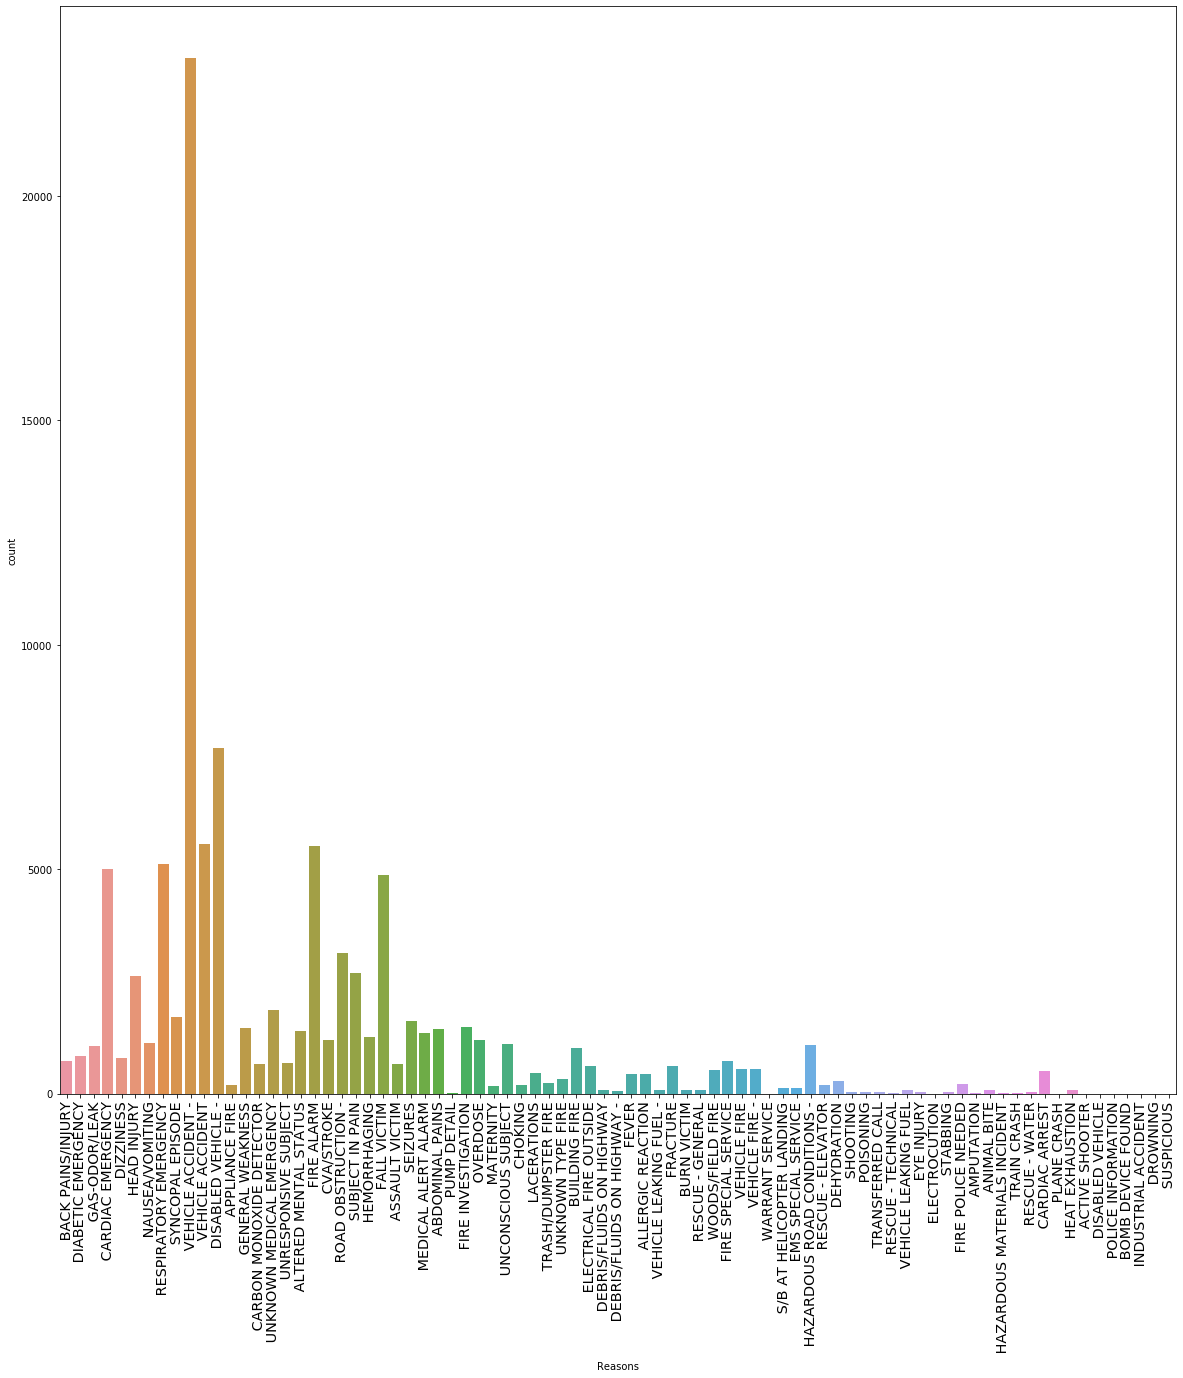

In [34]:
plt.figure(figsize=(20, 20))
chart=sns.countplot(data['Reasons'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,fontsize='x-large');

### 5) What is the data type of the objects in the timeStamp column?

In [11]:
data['timeStamp'].dtypes
type(data['timeStamp'][0])

str

### 6) You should have seen that these timestamps are still strings. Use pd.to_datetime to convert the column from strings to DateTime objects. 

In [12]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [13]:
data['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

### 7) You can now grab specific attributes from a Datetime object by calling them. For example time = df['timeStamp'].iloc[0] time.hour You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column

In [14]:
time = data['timeStamp'].iloc[0] 
time.month, time.hour, time.weekday()

(12, 17, 3)

In [15]:
data.insert(7,'Hour','')
data['Hour'] = data['timeStamp'].apply(lambda x : x.hour)

In [16]:
data.insert(8,'Month','')
data['Month']=data['timeStamp'].apply(lambda x : x.month)

In [17]:
data.insert(9,'Day of Week','')
data['Day of Week']=data['timeStamp'].apply(lambda x : x.weekday())

In [18]:
data.head()

,lat,lng,desc,zip,title,Department,Reasons,Hour,Month,Day of Week,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,EMS,BACK PAINS/INJURY,17,12,3,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,EMS,DIABETIC EMERGENCY,17,12,3,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,Fire,GAS-ODOR/LEAK,17,12,3,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,EMS,CARDIAC EMERGENCY,17,12,3,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,EMS,DIZZINESS,17,12,3,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### 8) Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Day of Week'] = data['Day of Week'].map(dmap)

In [20]:
data.head()

,lat,lng,desc,zip,title,Department,Reasons,Hour,Month,Day of Week,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,EMS,BACK PAINS/INJURY,17,12,Thu,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,EMS,DIABETIC EMERGENCY,17,12,Thu,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,Fire,GAS-ODOR/LEAK,17,12,Thu,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,EMS,CARDIAC EMERGENCY,17,12,Thu,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,EMS,DIZZINESS,17,12,Thu,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### 9) Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column

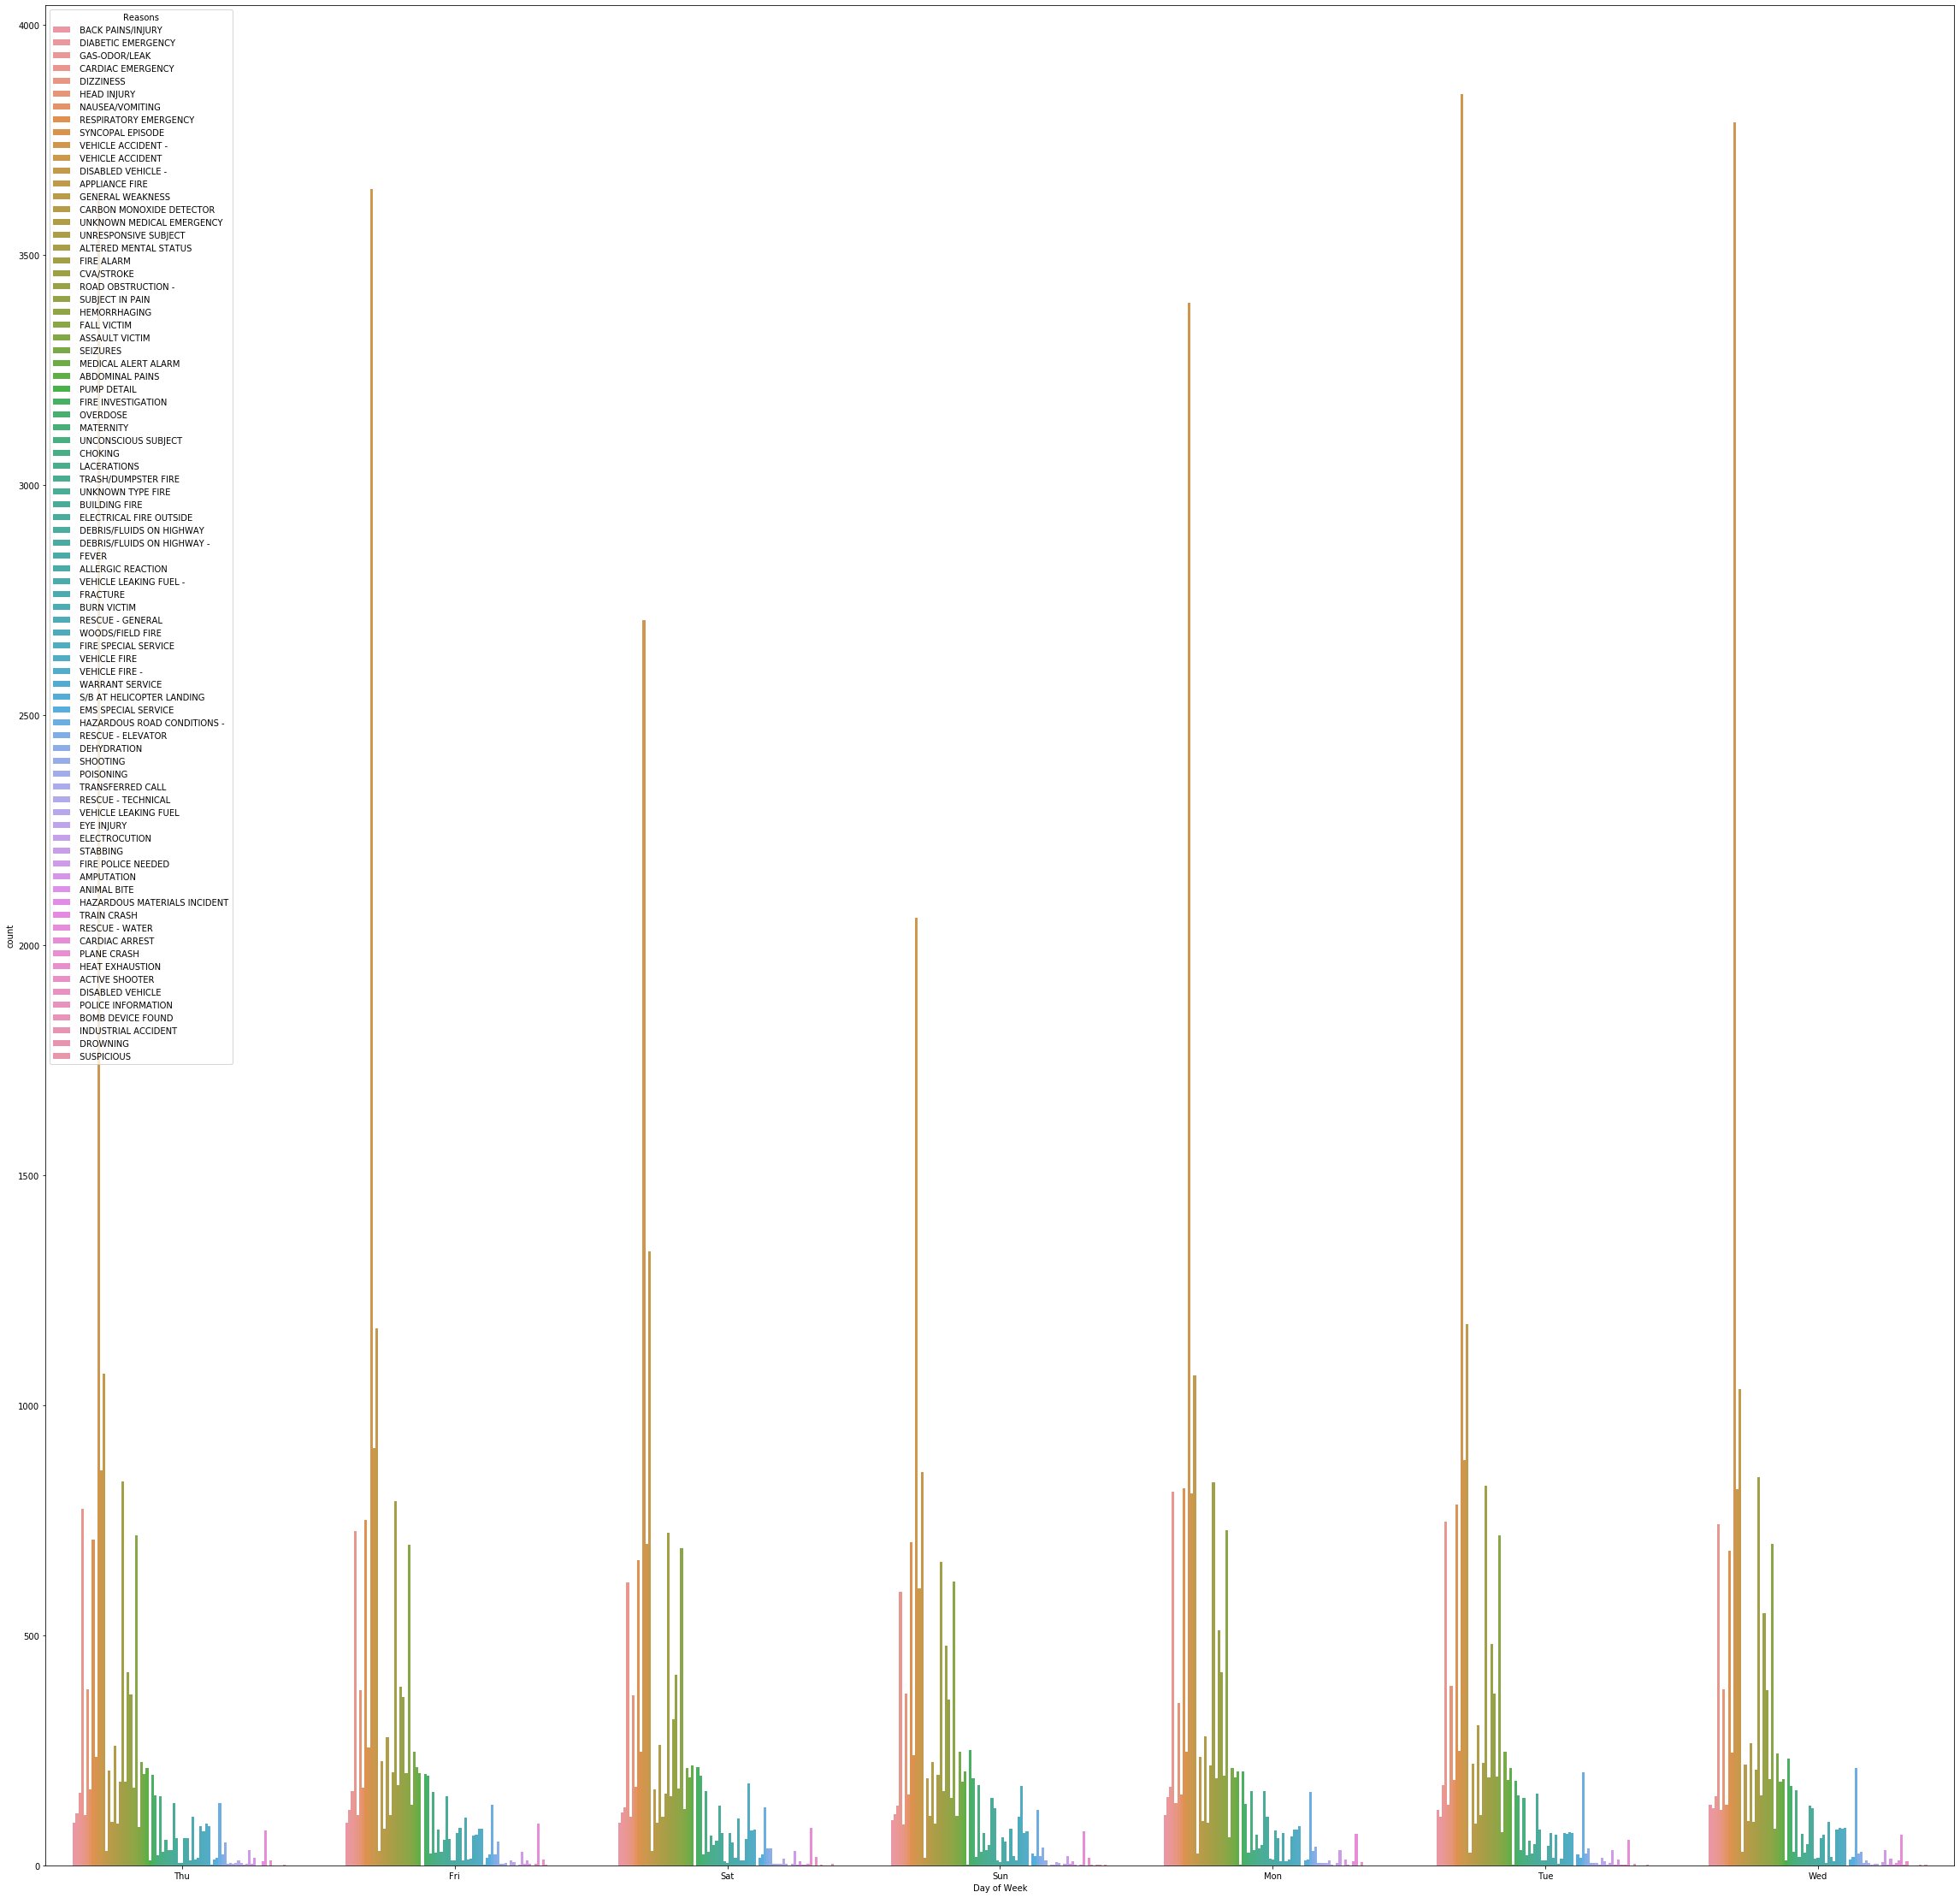

In [23]:
plt.figure(figsize=(40, 40))
sns.countplot(data['Day of Week'], hue=data['Reasons'])

### 10) You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas. Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame 
 
 

In [58]:
data.fillna(value='None')
data.isna().sum();

value1 = data.groupby('Month').count()
value1


,lat,lng,desc,zip,title,Department,Reasons,Hour,Day of Week,Date,timeStamp,twp,addr,e
Month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13205,13205,13205,13205,13205,13203,13096,13205
2,11467,11467,11467,9930,11467,11467,11467,11467,11467,11467,11467,11465,11396,11467
3,11101,11101,11101,9755,11101,11101,11101,11101,11101,11101,11101,11092,11059,11101
4,11326,11326,11326,9895,11326,11326,11326,11326,11326,11326,11326,11323,11283,11326
5,11423,11423,11423,9946,11423,11423,11423,11423,11423,11423,11423,11420,11378,11423
6,11786,11786,11786,10212,11786,11786,11786,11786,11786,11786,11786,11777,11732,11786
7,12137,12137,12137,10633,12137,12137,12137,12137,12137,12137,12137,12133,12088,12137
8,9078,9078,9078,7832,9078,9078,9078,9078,9078,9078,9078,9073,9025,9078
12,7969,7969,7969,6907,7969,7969,7969,7969,7969,7969,7969,7963,7916,7969


### 11) Now create a simple plot off of the dataframe indicating the count of calls per month 

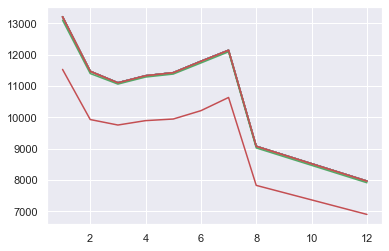

In [60]:
plt.plot(value1);

### Q12) Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.

In [47]:
Index =data.groupby('Month').count()
Index.head()



,lat,lng,desc,zip,title,Department,Reasons,Hour,Day of Week,Date,timeStamp,twp,addr,e
Month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13205,13205,13205,13205,13205,13203,13096,13205
2,11467,11467,11467,9930,11467,11467,11467,11467,11467,11467,11467,11465,11396,11467
3,11101,11101,11101,9755,11101,11101,11101,11101,11101,11101,11101,11092,11059,11101
4,11326,11326,11326,9895,11326,11326,11326,11326,11326,11326,11326,11323,11283,11326
5,11423,11423,11423,9946,11423,11423,11423,11423,11423,11423,11423,11420,11378,11423


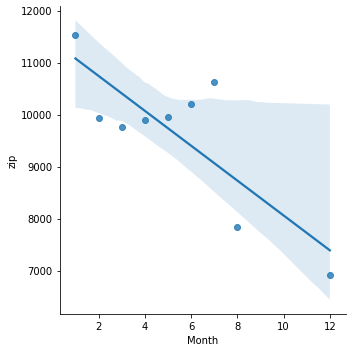

In [50]:
sns.lmplot(x='Month',y='zip',data=Index.reset_index())

### 13) Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method

In [26]:
data.insert(10,'Date','')
data['Date']=data['timeStamp'].apply(lambda x : x.date())

In [27]:
data.head()

,lat,lng,desc,zip,title,Department,Reasons,Hour,Month,Day of Week,Date,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,EMS,BACK PAINS/INJURY,17,12,Thu,2015-12-10,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,EMS,DIABETIC EMERGENCY,17,12,Thu,2015-12-10,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,Fire,GAS-ODOR/LEAK,17,12,Thu,2015-12-10,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,EMS,CARDIAC EMERGENCY,17,12,Thu,2015-12-10,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,EMS,DIZZINESS,17,12,Thu,2015-12-10,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### 14) Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls 

In [28]:
value = data.groupby('Date').count()

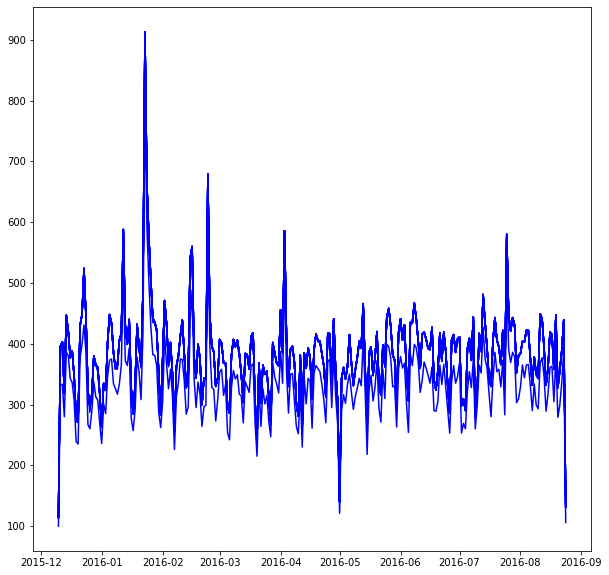

In [36]:
plt.figure(figsize=(10, 10))
plt.plot(value, color='blue');

### 15) Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call 
 
 

### 16) Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week 

In [24]:
dayHour = data.groupby(by=['Day of Week','Hour']).count()['Reasons'].unstack()

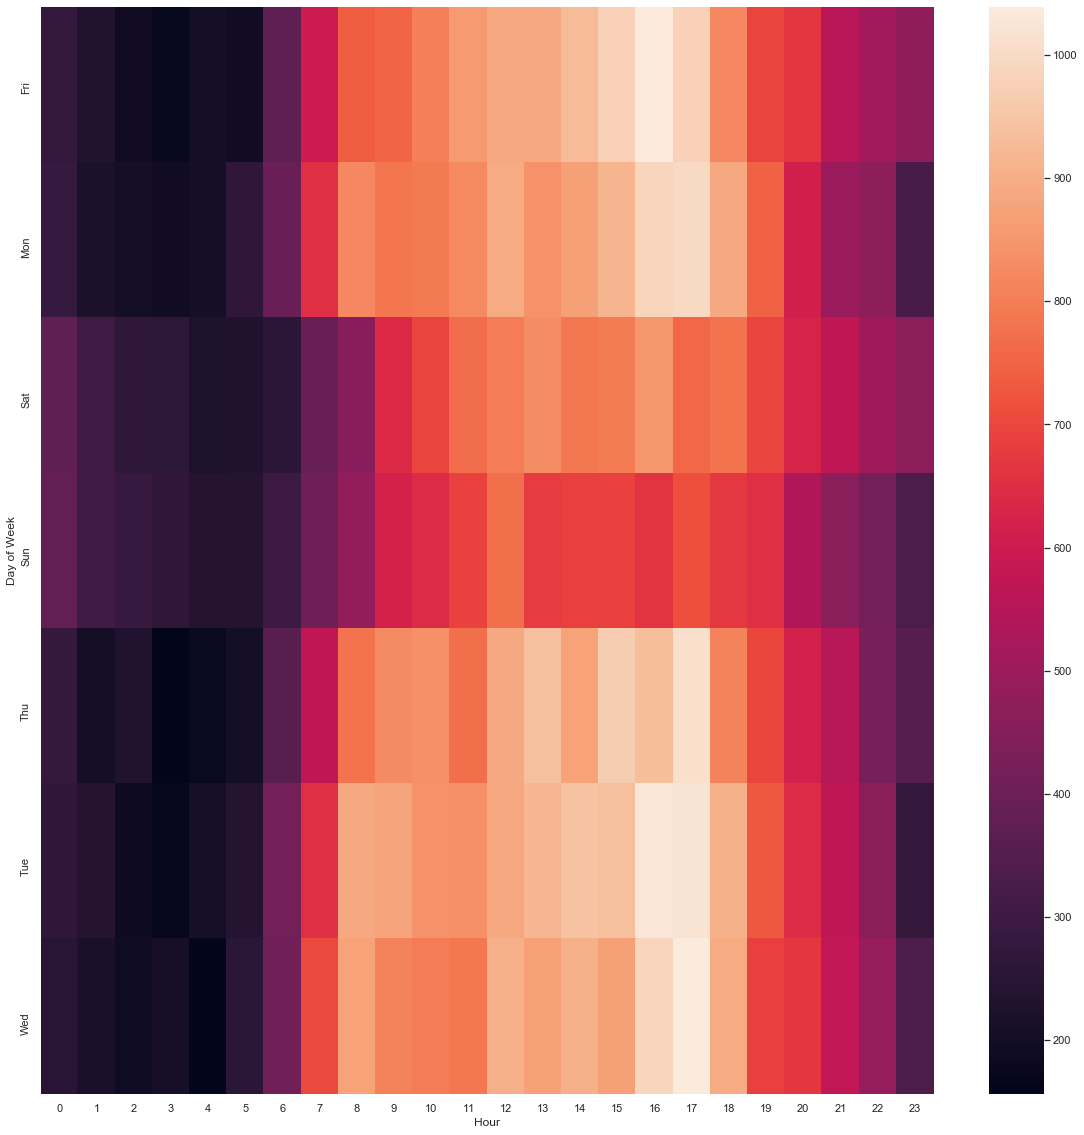

In [53]:
plt.figure(figsize=(20, 20))

sns.heatmap(dayHour)
sns.set(font_scale=1)